# 이미지 색상(color) 데이터 추출
- VGG16 모델을 사용한 이미지 특성 추출 외에 추가적으로 예측 모델링에 사용할 이미지 특성
- 수많은 크라우드펀딩 상품 목록에서 가장 먼저 눈에 보이는 것은 생성자가 등록한 사진이며, 목록에선 사진의 크기는 작음
- 그렇다면 가장 먼저 눈에 띄는 것은, 눈에 띌 수 있는 것은 바로 색상
- 색 특성:
    - 이미지에서 특정 색 추출?
    - 이미지의 평균 색 추출?
    - 이미지의 가장 많은 색 추출?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from datetime import datetime, timedelta
np.random.seed(1)

In [4]:
import scipy
import sklearn
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as sio

In [10]:
parse_dates=['date_created','date_deadline','date_launched','date_ended']
kickstarter_dataset = pd.read_csv('./kickstarter_dataset_updated.csv', parse_dates=parse_dates)

In [13]:
ks_suc_fail_only = kickstarter_dataset[kickstarter_dataset['state'].isin(['successful','failed'])]
ks_suc_fail_only.shape

(200232, 49)

## 이미지의 특정 색상 추출

추출하고 싶은 색상을 입력하세요 (orange, blue, green) :  orange


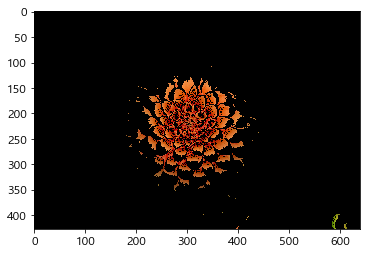

In [81]:
# 원하는 색 추출

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

def RGB2HSV(RGB):
    # HSV 색상을 얻기 위해서는 array 타입이 float이 되어야 계산할 수 있다
    RGB_array = np.array(RGB).astype(np.float64)
    # 변환할 HSV 이미지 생성
    HSV = np.array(RGB).astype(np.float64)
    # RGB 이미지의 width, height 저장
    width, height = RGB_array.shape[:2]
    
    # 이미지 크기만큼 for 루프
    for i in range(width):
        for j in range(height):
            # 공식 따라서 구현
            var_R = RGB_array[i, j, 0] / 255.0
            var_G = RGB_array[i, j, 1] / 255.0
            var_B = RGB_array[i, j, 2] / 255.0
            C_Min = min(var_R, var_G, var_B)
            C_Max = max(var_R, var_G, var_B)
            change = C_Max - C_Min
            V = C_Max
            if C_Max == 0:
                S = 0
            else:
                S = change / C_Max
            if change == 0:
                H = 0
            else:
                if var_R == C_Max:
                    H = 60 * (((var_R - var_B)/change)%6)
                elif var_G == C_Max:
                    H = 60 * (((var_B - var_R)/change)+2)
                elif var_B == C_Max:
                    H = 60 * (((var_R - var_B)/change)+4)
            HSV[i, j, 0] = H
            HSV[i, j, 1] = S
            HSV[i, j, 2] = V
    return HSV

def Mask(HSV, color):
    # 범위값과 비교할 hsv 이미지 생성, 파라미터에 있는 HSV를 그냥 쓰면 원소값이 float이 아닌 int로 나옴
    hsv = np.array(HSV).astype(np.float64)
    # HSV 이미지의 width, height 저장
    width, height = HSV.shape[:2]
    # 모든 값은 원소 값이 0 인 마스크 행렬 생성
    mask = np.zeros((width, height))

    # hsv 값과 범위 비교
    for i in range(width):
        for j in range(height):
            # H, S, V 값이 원하는 범위 안에 들어갈 경우 mask 원소 값을 1로 만든다
            if hsv[i, j, 0] > lower[color][0] and hsv[i, j, 1] > lower[color][1] and hsv[i, j, 2] > lower[color][2] and hsv[i, j, 0] < upper[color][0] and hsv[i, j, 1] < upper[color][1] and hsv[i, j, 2] < upper[color][2]:
                mask[i, j] = 1
    return mask

def Extraction(image, mask):
    # Object를 추출할 이미지를 생성
    result_img = np.array(image)
    # RGB 이미지의 width, height 저장
    width, height = image.shape[:2]

    # for 루프를 돌면서 mask 원소 값이 0인 인덱스는 원본 이미지도 0으로 만들어 준다.
    for i in range(width):
        for j in range(height):
            if(mask[i, j] == 0):
                result_img[i, j, 0] = 0
                result_img[i, j, 1] = 0
                result_img[i, j, 2] = 0
    return result_img

if __name__ == '__main__':

    # 마스크 색상 범위에 사용할 딕셔너리 정의
    upper = {}
    lower = {}
    upper['orange'] = [100, 1, 1]
    upper['blue'] = [300, 1, 1]
    upper['green'] = [180, 0.7, 0.5]
    lower['orange'] = [0, 0.7, 0.5]
    lower['blue'] = [70, 0.7, 0.2]
    lower['green'] = [101, 0.15, 0]

    # 이미지 파일을 읽어온다
    input_image = mping.imread('flower.jpg')

    # 추출하고 싶은 색상 입력
    input_color = input("추출하고 싶은 색상을 입력하세요 (orange, blue, green) : ")

    # RGB to HSV 변환
    HSV = RGB2HSV(input_image)

    # HSV 이미지를 가지고 마스크 생성
    mask = Mask(HSV, input_color)

    # mask를 가지고 원본이미지를 Object 추출 이미지로 변환
    result_image = Extraction(input_image, mask)

    #mping.imsave("result.jpg", result_image)

    # 이미지 보여주기
    imgplot = plt.imshow(result_image)
    plt.show()

In [ ]:
#if PIL is giving you an image with mode “P” or pretty much any mode that isn’t “RGBA”,
#then you need to apply an alpha mask to convert it to RGBA.
#You can do that pretty easily with:

if im.mode == 'P':
    im.putalpha(0)

### 이미지의 평균 or 우세 색상 추출

#### 평균 색상 추출

In [ ]:
# Method 1

In [1]:
from PIL import Image

def compute_average_image_color(img):
    width, height = img.size

    r_total = 0
    g_total = 0
    b_total = 0

    count = 0
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            r_total += r
            g_total += g
            b_total += b
            count += 1

    return (r_total/count, g_total/count, b_total/count)

img = Image.open('flower.jpg')
#img = img.resize((50,50))  # Small optimization
average_color = compute_average_image_color(img)
print(average_color)

(55.13415178571429, 73.57914227166276, 57.000212236533955)


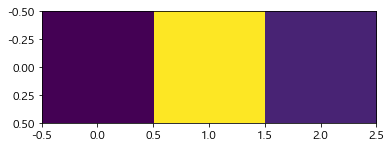

In [5]:
plt.imshow([average_color])
plt.show()

In [ ]:
# Method 2

In [48]:
from PIL import Image
import numpy as np

def getAverageRGBN(image):
  # get image as numpy array
    im = np.array(image)
  # get shape
    w,h,d = im.shape
  # change shape
    im.shape = (w*h, d)
  # get average
    return tuple(np.average(im, axis=0))

test_image = Image.open('19.png')
getAverageRGBN(test_image)

(145.0968537414966, 153.37739795918367, 153.67507369614512, 254.96823696145125)

In [30]:
def getAverageRGBN(image):
  # get image as numpy array
    im = np.array(image)
  # get shape
    w,h,d = im.shape
  # change shape
    im.shape = (w*h, d)
  # get average
    return tuple(im.mean(axis=0))

test_image = Image.open('flower.jpg')
getAverageRGBN(test_image)

(55.13415178571429, 73.57914227166276, 57.000212236533955)

#### 이미지 팔레트 추출(get image palette)

In [ ]:
# Method 1

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("19.png")
im = im.convert("P")
im = im.convert("P", palette = Image.ADAPTIVE, colors = 16)

In [20]:
im.palette

In [21]:
im.getcolors()
#(count, rgbaColor ), ( count, rgbaColor )

[(19, 0),
 (13, 1),
 (13, 2),
 (12, 3),
 (11, 4),
 (10, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (7, 10),
 (7, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (5, 20),
 (5, 21),
 (4, 22),
 (4, 23),
 (4, 24),
 (4, 25),
 (4, 26),
 (4, 27),
 (3, 28),
 (3, 29),
 (3, 30),
 (2, 31),
 (2, 32),
 (2, 33),
 (2, 34),
 (1, 35),
 (1, 36),
 (13144, 37),
 (12033, 38),
 (10299, 39),
 (9876, 40),
 (9689, 41),
 (9220, 42),
 (8703, 43),
 (8273, 44),
 (7978, 45),
 (7568, 46),
 (7379, 47),
 (4836, 48),
 (4666, 49),
 (3906, 50),
 (3870, 51),
 (3276, 52),
 (3220, 53),
 (2513, 54),
 (2285, 55),
 (1963, 56),
 (1778, 57),
 (1576, 58),
 (1544, 59),
 (1522, 60),
 (1514, 61),
 (1406, 62),
 (1405, 63),
 (1342, 64),
 (1075, 65),
 (965, 66),
 (955, 67),
 (916, 68),
 (849, 69),
 (836, 70),
 (814, 71),
 (778, 72),
 (768, 73),
 (708, 74),
 (668, 75),
 (610, 76),
 (555, 77),
 (509, 78),
 (479, 79),
 (458, 80),
 (445, 81),
 (443, 82),
 (433, 83),
 (431, 84),
 (378, 85),
 (373, 86),
 (

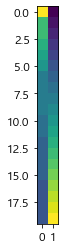

In [22]:
plt.imshow(im.getcolors()[:20])
plt.show()

In [ ]:
# Method 2

In [73]:
import numpy as np
from PIL import Image

def palette(img):
    """
    Return palette in descending order of frequency
    """
    arr = np.asarray(img)
    palette, index = np.unique(asvoid(arr).ravel(), return_inverse=True)
    palette = palette.view(arr.dtype).reshape(-1, arr.shape[-1])
    count = np.bincount(index)
    order = np.argsort(count)
    return palette[order[::-1]]

def asvoid(arr):
    """View the array as dtype np.void (bytes)
    This collapses ND-arrays to 1D-arrays, so you can perform 1D operations on them.
    http://stackoverflow.com/a/16216866/190597 (Jaime)
    http://stackoverflow.com/a/16840350/190597 (Jaime)
    Warning:
    >>> asvoid([-0.]) == asvoid([0.])
    array([False], dtype=bool)
    """
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))

img = Image.open('19.png', 'r').convert('RGB')
print(palette(img)[:10]) #To get the top ten colors
# returns numpy array; each row can be interpreted as a color

[[  0 174 239]
 [ 11 161  75]
 [247 148  30]
 [237  28  36]
 [255 255 255]
 [  0   0   0]
 [168 163 171]
 [236  28  36]
 [  0 173 238]
 [168 163 170]]


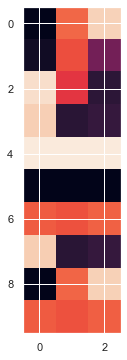

In [74]:
plt.imshow(palette(img)[:10])
plt.show()

In [ ]:
# Method 3

In [ ]:
#https://github.com/fengsp/color-thief-py

In [31]:
import sys

if sys.version_info < (3, 0):
    from urllib2 import urlopen
else:
    from urllib.request import urlopen

import io
from colorthief import ColorThief

#image file로 불러오기
color_thief = ColorThief('./flower.jpg')

#image url로 불러오기
#fd = urlopen('https://ksr-ugc.imgix.net/assets/025/618/188/1ee876a3b9923c72e2e44204021d747f_original.png?ixlib=rb-2.1.0&crop=faces&w=560&h=315&fit=crop&v=1561555002&auto=format&frame=1&q=92&s=a0e9ad6ed015ce4a5413939a086210ac')
#f = io.BytesIO(fd.read())
#color_thief = ColorThief(f)

# Get the dominant color
print(color_thief.get_color(quality=1)) # visually most dominant color; quality=1 is the highest quality
dominant_color = color_thief.get_color(quality=1) #return tuple: (r, g, b)
# Build a color pallete
print(color_thief.get_palette(color_count=6, quality=1)) #color_count: max number of colors; quality: 1 is the highest quality (the most detailed color extraction)
color_palette = color_thief.get_palette(color_count=6, quality=1) #return tuple: (r, g, b)

(211, 134, 79)
[(8, 54, 49), (215, 148, 89), (181, 34, 8), (28, 102, 78), (4, 92, 116), (116, 150, 23)]


In [15]:
ks_suc_fail_only['photo_link'][0]

'https://ksr-ugc.imgix.net/assets/025/618/188/1ee876a3b9923c72e2e44204021d747f_original.png?ixlib=rb-2.1.0&crop=faces&w=560&h=315&fit=crop&v=1561555002&auto=format&frame=1&q=92&s=a0e9ad6ed015ce4a5413939a086210ac'

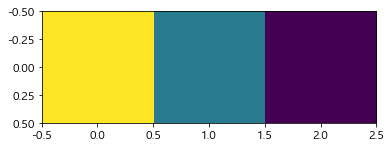

In [32]:
plt.imshow([dominant_color])
plt.show()

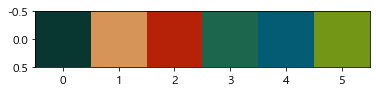

In [33]:
plt.imshow([color_palette])
plt.show()

In [ ]:
# Method 4

In [ ]:
# https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/

In [27]:
from matplotlib import image as img
image = img.imread('./flower.jpg')
image.shape

(427, 640, 3)

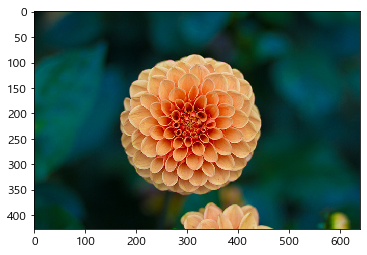

In [28]:
plt.imshow(image)

In [29]:
r = []
g = []
b = []

for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

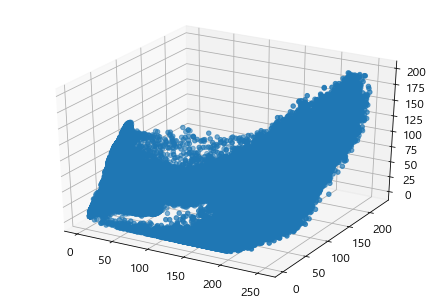

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [31]:
import pandas as pd
df = pd.DataFrame({'red': r, 'blue': b, 'green': g})

In [32]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
17271,0,67,59,0.000000,2.016550,1.296395
115882,1,80,88,0.011234,2.407821,1.933606
63416,1,64,77,0.011234,1.926257,1.691905
72434,0,100,85,0.000000,3.009776,1.867687
235122,60,21,56,0.674036,0.632053,1.230476
109701,229,42,112,2.572569,1.264106,2.460953
69024,0,62,70,0.000000,1.866061,1.538095
1961,65,60,76,0.730205,1.805866,1.669932
130471,0,76,67,0.000000,2.287430,1.472177
54114,21,31,33,0.235912,0.933031,0.725102


In [33]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

In [34]:
print(cluster_centers)

[[0.17382497 1.19080796 1.4437115 ]
 [2.42412721 3.34203284 2.81681598]]


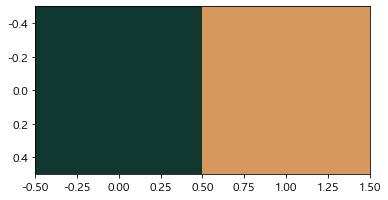

In [40]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))
plt.imshow([colors])
plt.show()

In [6]:
#위의 코드들을 하나로
from matplotlib import image as img
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans

def get_dominant_colors(image):
    r = []
    g = []
    b = []
    for line in image:
        for pixel in line:
            temp_r, temp_g, temp_b = pixel
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)
    df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
    df['scaled_red'] = whiten(df['red'])
    df['scaled_blue'] = whiten(df['blue'])
    df['scaled_green'] = whiten(df['green'])
    df.sample(n = 10)
    cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)
    print(cluster_centers)
    
    colors = []
    r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
    for cluster_center in cluster_centers:
        scaled_r, scaled_g, scaled_b = cluster_center
        colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))
    print(colors)
    plt.imshow([colors])
    plt.show()

[[2.42454987 3.34347061 2.8189421 ]
 [0.1743777  1.19108153 1.44358823]]
[(0.8463698671660508, 0.5967231526723187, 0.3672929001281287), (0.0608723418181698, 0.2125772914710383, 0.18809173388013253)]


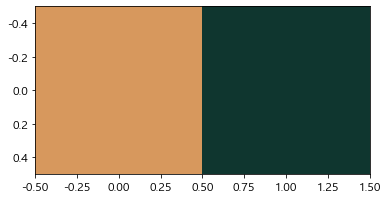

In [7]:
image = img.imread('flower.jpg')
#image.shape

get_dominant_colors(image)

In [ ]:
# Method 5

In [ ]:
# 참고:
# https://github.com/rmotr/color-extractor-service
# https://nbviewer.jupyter.org/github/rmotr/color-extractor-service/blob/master/demo/Extract%20colors%20from%20images.ipynb

In [ ]:
# Method 6

In [ ]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open('image.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))